# Model A

In [1]:
import os,sys
import numpy as np
# --- provabgs --- 
from provabgs import infer as Infer
from provabgs import models as Models

/global/homes/c/chahah/.conda/envs/gqp/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False


Bad key text.latex.preview in file /global/homes/c/chahah/.conda/envs/gqp/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /global/homes/c/chahah/.conda/envs/gqp/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /global/homes/c/chahah/.conda/envs/gqp/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95 

In [3]:
# SPS parameter priors 
prior_sps = Infer.load_priors([
    Infer.UniformPrior(7., 12.5, label='sed'),
    Infer.FlatDirichletPrior(4, label='sed'),           # flat dirichilet priors
    Infer.UniformPrior(0., 1., label='sed'),            # burst fraction
    Infer.UniformPrior(1e-2, 13.27, label='sed'),       # tburst
    Infer.LogUniformPrior(4.5e-5, 1.5e-2, label='sed'), # log uniform priors on ZH coeff
    Infer.LogUniformPrior(4.5e-5, 1.5e-2, label='sed'), # log uniform priors on ZH coeff
    Infer.UniformPrior(0., 3., label='sed'),            # uniform priors on dust1
    Infer.UniformPrior(0., 3., label='sed'),            # uniform priors on dust2
    Infer.UniformPrior(-2., 1., label='sed')            # uniform priors on dust_index
])

# SPS model 
m_sps = Models.NMF(burst=True, emulator=False)

input parameters : logmstar, beta1_sfh, beta2_sfh, beta3_sfh, beta4_sfh, fburst, tburst, gamma1_zh, gamma2_zh, dust1, dust2, dust_index


In [6]:
Nsample = 1000
thetas_sps  = np.array([prior_sps.transform(prior_sps.sample()) for i in range(Nsample)])
thetas_unt  = prior_sps.untransform(thetas_sps)
redshifts   = np.random.uniform(0, 0.06, Nsample) 
thetas      = np.concatenate([thetas_sps, np.atleast_2d(redshifts).T], axis=1)

In [7]:
def SED(tt): 
    return m_sps.sed(tt[:-1], tt[-1]) 

In [19]:
ws, fs = [], [] 
for i in range(10): 
    w, f = SED(thetas[i])
    ws.append(w)
    fs.append(f)

In [59]:
%timeit w, f = SED(thetas[0])

214 ms ± 6.27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


(0.0, 500.0)

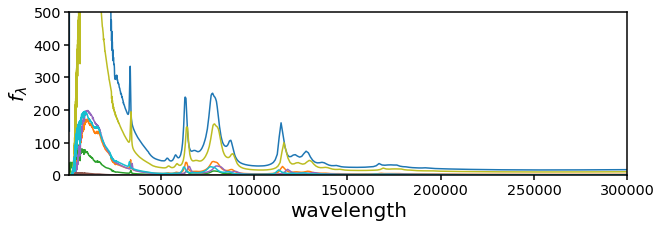

In [38]:
fig = plt.figure(figsize=(10,3))
sub = fig.add_subplot(111)
for i in range(10): 
    sub.plot(ws[i], fs[i])#/ws[i])
sub.set_xlabel('wavelength', fontsize=20)
sub.set_xlim(1e3, 300000)
#sub.set_xscale('log')
sub.set_ylabel('$f_\lambda$', fontsize=20)
sub.set_ylim(0., 500)
#sub.set_yscale("log")